### Supervised Learning With Scikit-Learn

In [1]:
from sklearn import datasets 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X = iris.data

In [7]:
y = iris.target


In [8]:
df = pd.DataFrame(X, columns = iris.feature_names)


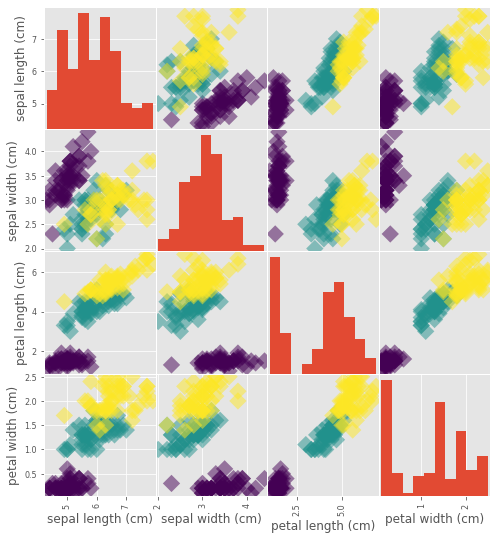

In [9]:
plot = pd.plotting.scatter_matrix(df, c = y, figsize = [8,9], 
                              s = 150, marker = 'D')

### The classification challegenge 

#### K - Nearest Neighbors 
- Looking at the 'k' closest labeled data points 
- Taking a majority vote 
- Training a model on the data = 'fitting' a model to the data (.fit()) method 
- To predict the labels of new data: .predict() method

In [10]:
from sklearn.neighbors import KNeighborsClassifier 

In [11]:
knn = KNeighborsClassifier(n_neighbors=6)

In [12]:
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [13]:
iris['data'].shape

(150, 4)

In [14]:
iris['target'].shape

(150,)

In [15]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                [5.7, 2.6, 3.8, 1.3],
                [4.7, 3.2, 1.3, 0.2]])
prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [16]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


#### Measuring model performance 
- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Split data into training and test set
- Fit/train the classi,er on the training set
- Make predictions on test set
- Compare predictions with the known labels

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                   random_state = 21, stratify = y)

In [19]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [21]:
y_pred = knn.predict(X_test)

In [22]:
y_pred

array([2, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2,
       1])

In [23]:
knn.score(X_test, y_test)

0.9555555555555556

In [25]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]


In [26]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       0.93      0.93      0.93        15\n           2       0.93      0.93      0.93        15\n\n    accuracy                           0.96        45\n   macro avg       0.96      0.96      0.96        45\nweighted avg       0.96      0.96      0.96        45\n'